# In The Name Of Allah

# Object-Oriented DBMSs - Concepts

- The framework for an object-oriented data model.
- Functional Data Model (FDM)
- Persistent Programming Languages
- OODBMS Perspectives
- The difference between the two-level storage model used by conventional DBMSs and the single-level model used by OODBMSs. 
- How pointer swizzling techniques work
- Classification of pointer swizzling
- Accessing an Object
- Persistence Schemes
- Orthogonal persistence



## The framework for an object-oriented data model

### Definition of Object-Oriented DBMSs

> OODM: A __(logical)__ data model that __captures the semantics of objects__ supported in object-oriented programming.

> OODB: A __persistent and sharable collection of objects__ defined by an OODM.

> OODBMS: The __manager__ of an OODB.

- integrating object-oriented concepts with database systems, namely the Object-Oriented Database Management System (OODBMS).
- The OODBMS started in the engineering and design domains and has recently also become the favored system for financial and telecommunications applications.

### OODBMS must, at a minimum, satisfy:

- it must provide database functionality.
- it must support object identity.
- it must provide encapsulation.
- it must support objects with complex state.


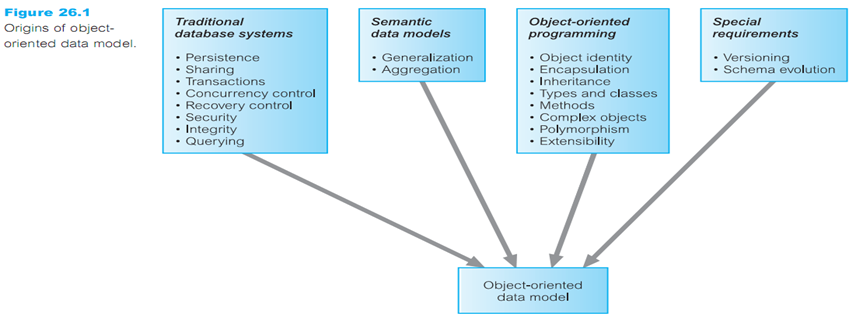

## Functional Data Model (FDM)

> the functional data model (FDM), which is one of the __simplest__ in the family of semantic data models . 
- This model is interesting because it shares certain ideas with the object approach including object __identity, inheritance, overloading, and navigational access__.
- in the FDM, any data retrieval task can be consider as the process of evaluating and returning the result of a function with zero, one, or more . 
- The resulting data model is conceptually __simple__ while at the same time is very __expressive__.

## In the FDM, the are two  main modeling primitives

### 1- Entities 
> decomposed into (abstract) entity types and (printable) entity types.
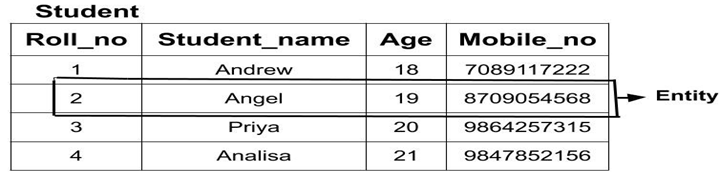
- Entity types :correspond to classes of ‘real world’ objects and are declared as 
  - functions with zero arguments that return the type ENTITY. EX: Student() ---› ENTITY
  - Printable entity types are like to the base types in a programming language and include: INTEGER, CHARACTER, STRING, REAL, and DATE. An attribute is deﬁned as a functional relationship like Student No(Student) ---›  STRING , Name (Student) ---› CHAR
  
  
- We can declare a composite attribute by ﬁrst declaring the attribute to be an entity type and the declaring its components as functional relationships of the  entity type.
```
                   Name () ---› ENTITY
                   Name (Student) ---› NAME
                   FName (Name) ---› STRING
                   LName (Name) ---› STRING
```
### 2- Functional  Relationships

> Functions with arguments model not only the properties (attributes) of entity types but also relationships between entity types.

- Each relationship may have an inverse relationship deﬁned.
  - Manages (Staff) ---››    PropertyForRent
  - ManagedBy (PropertyForRent) ---› Staff  INVERSE OF Manages

> Note: the double-headed arrow(---››) is used to represent a one-to-many relationship 

> &Many-to-many relationships can be modeled by using the double-headed arrow in both directions.

- The FDM also supports multi-valued functions:
  - ViewDate (Client, PropertyForRent) ---› DATE 


## Persistent Programming Languages

> A language that provides its users with the ability to (transparently) keep data across successive executions of a program, and even allows such data to be used by many different programs.

- Data in a persistent programming language is different from an OODBMS it independent of any program, able to exist after the execution and lifetime of the code that created it.



## Database Programming Languages
> A language that integrates some ideas from the database programming model with features of traditional programming language

- In contrast, a database programming language is distinguished from a persistent programming language by its integration of features beyond persistence, such as transaction management, concurrency control, and recovery.


## OODBMS Perspectives

- Modern DBMSs are characterized by their support of the following features
  - 1- __A data model__: A particular way of describing data, relationships between data, and constraints on the data.
  - 2- __Data persistence__: The ability for data to outlive the execution of a program and possibly the lifetime of the program itself.
  - 3- __Data sharing__ :The ability for multiple applications (or instances of the same one) to access common data, possibly at the same time.
  - 4- __Reliability__ :The assurance that the data in the database is protected from hardware and software failures.
  - 5- __Scalability__ : The ability to operate on large amounts of data in simple ways.
  - 6- __Security and integrity__ :The protection of the data against unauthorized access, and the assurance that the data conforms to specified correctness and consistency rules.
  - 7- __Distribution__ :The ability to physically distribute a logically interrelated collection of shared data over a computer network, preferably making the distribution transparent to the user. 

> In contrast, traditional programming languages provide constructs for procedural control and for data and functional abstraction, but lack built-in support for many of the above database features. While each is useful in its respective domain, there exists an increasing number of applications


## The difference between the two-level storage model used by conventional DBMSs and the single-level model used by OODBMSs.

- Conventional DBMSs have a two-level storage model the application storage model in main or  virtual memory, and the database storage model on  disk.

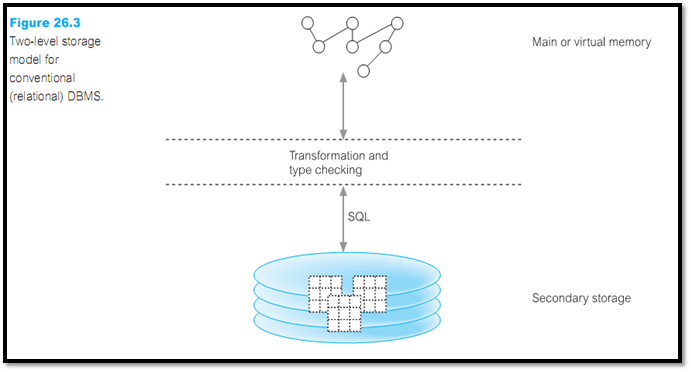

- an OODBMS tries to give the illusion of a single-level storage model, with a similar representation in both memory and in the database stored on disk

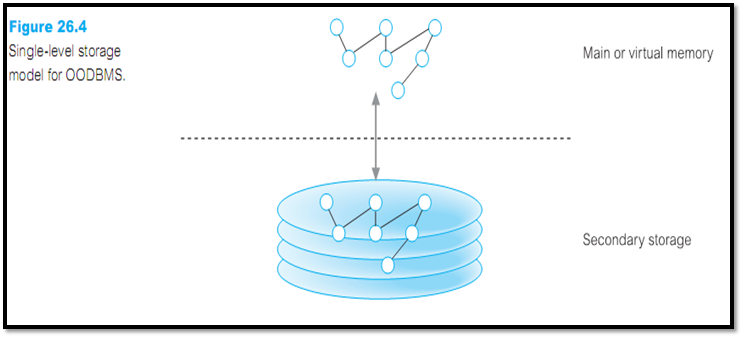

## How pointer swizzling techniques work

> Pointer swizzling (object faulting):The operation  of converting object identifiers to main 
memory pointers, and back again.
- The aim of pointer swizzling is to optimize access to objects. 
### Techniques pointer swizzling that can be employed

#### 1-No swizzling

- The easiest implementation of faulting objects into and out of memory is not to do any  swizzling at all.
- faulted objects into memory by the implicitly object manager and is passed back to the application containing the object’s OID
- The OID is used every time the object is accessed.
  
> This requires that the system maintain some type of lookup table so that the object’s virtual memory pointer can be located and then used to access the object.
  
> As the lookup is required on each object access, this could be inefficient if the same object is accessed repeatedly.

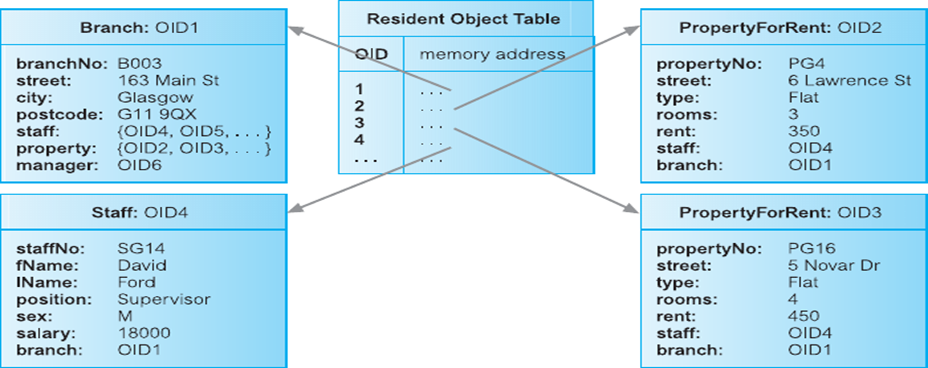

#### 2- Object referencing
> To be able to swizzle a persistent object’s OID to a virtual memory pointer, a mechanism is required to distinguish between resident and non-resident objects. Most techniques are variations of either edge marking or node marking. 

- Considering virtual memory as a directed graph consisting of objects as nodes and references as directed edges, edge marking marks every object pointer with a tag bit. 
- If thebit is set, then the reference is to a virtual memory pointer; otherwise, it is still pointing to an OID and needs to be swizzled when the object it refers to is faulted into the application’s memory space. 
- Node marking requires that all object references are immediately converted to virtual memory pointers when the object is faulted into memory. 
- The ﬁrst approach is a software-based technique but the second approach can be implemented using software- or hardware-based techniques.


##### 2-1 Hardware-based schemes

- Hardware-based swizzling uses __virtual memory access__ protection violations to detect accesses to non-resident objects.
- These schemes use the standard virtual memory hardware to trigger the transfer of persistent data from disk to main memory.
- The hardware approach has been used in several commercial and research systems .
- advantage of the hardware-based approach is that accessing memory-resident persistent objects is just as efficient as accessing transient objects because the hardware approach avoids the overhead of residency checks incurred by software approaches. 


- disadvantage of the hardware-based approach is that it makes the provision of many useful kinds of database functionality much more difficult, such as fine-grained locking, referential integrity, recovery, and flexible buffer management policies.
- The  hardware approach limits the amount of data that can be accessed during a  transaction to the size of virtual memory. 
- This limitation could be overcome by using some form of garbage collection to reclaim memory space, although this would add  overhead and complexity to the system.


## Classification of pointer swizzling

>Pointer swizzling techniques can be classified according to the following three dimensions:

- 1- __Copy versus in-place swizzling__: When faulting objects in, the data can either be copied into the application’s local object cache or it can be accessed in place within the object manager’s page cache .


- 2- __Eager versus lazy swizzling__: eager swizzling is the swizzling of all OIDs for persistent objects on all data pages used by the application before any object can be accessed.  Lazy swizzling swizzles pointers only as they are accessed or discovered. 


- 3- __Direct versus indirect swizzling__: With direct swizzling, the virtual memory pointer of the referenced object is placed directly in the swizzled pointer; with indirect swizzling, the virtual memory pointer is placed in an intermediate object, which acts as a placeholder for the actual object.


## Accessing an Object

> How an object is accessed on secondary storage
- Steps in accessing a record using a conventional DBMS with a two-level storage model, we find  that the steps, illustrated in Figure


- The DBMS determines the page on secondary storage that contains the required record using indexes or table scans.


- The DBMS then reads that page from secondary storage and copies it into its cache.


- The DBMS subsequently transfers the required parts of the record from the cache into the  application’s memory space.


- Conversions may be necessary to convert the SQL data types into the application’s data types.


- The application can then update the record’s fields in its own memory space.


- The application transfers the modified fields back to the DBMS cache using SQL, again requiring conversions between data types.


- Finally, at an appropriate point the DBMS writes the updated page of the cache back to secondary storage.

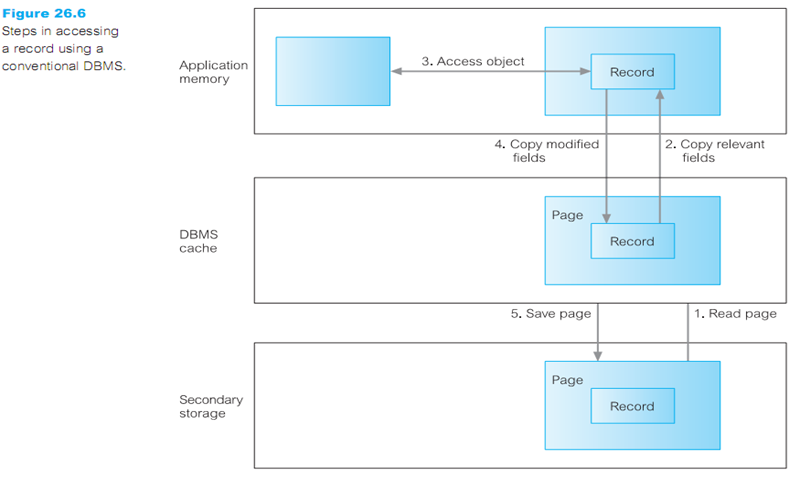

> In contrast, with a single-level storage model, an OODBMS uses the following steps to retrieve an object from secondary storage, as illustrated in Figure

- The OODBMS determines the page on secondary storage that contains the required Object using its OID 


- The OODBMS then reads that page from secondary storage and copies it into the application’s page cache within its memory space.


- The OODBMS may then carry out a number of conversions, such as:


  - swizzling references (pointers) between objects.
  
  
  - adding some information to the object’s data structure.
  
  
  - modifying the data representations for data that has come from a different hardware platform or programming language.
  
  
  - The application can then directly access the object and update it, as required.
  
  
  - When the application wishes to make the changes persistent, or when the OODBMS needs to swap the page out of the page cache, the OODBMS may need to carry out similar conversions as listed above, before copying the page back to secondary storage.

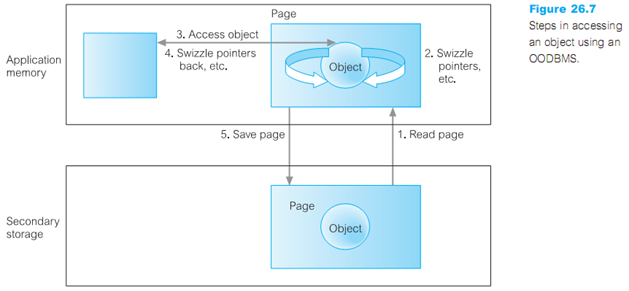

## Persistence Schemes

> The main strategies that can be used to create persistent objects .


- A DBMS must provide support for the storage of persistent objects, that is, objects that survive after the user session or application program that created them has terminated. 


- This is in contrast to transient objects that last only for the invocation of the program. 


- Persistent objects are retained until they are no longer required, at which point they are deleted.

### Persistence Schemes

- Three schemes for implementing persistence within an OODBMS:
#### 1- Check pointing


- Some systems implement persistence by copying all or part of a program’s address space to secondary storage. In cases where the complete address space is saved, the program can restart from the checkpoint.


- Check pointing has two main drawbacks: typically, a checkpoint can be used only by the program that created it; second, a checkpoint may contain a large amount of data that is of no use in subsequent executions.

#### 2-Serialization
- Some systems implement persistence by copying the closure of a data structure to disk.


- This process is sometimes called serialization, pickling, or in a distributed computing context, marshaling.


- Serialization has two inherent problems. First, it does not preserve object identity. Second, serialization is not incremental, and so saving small changes to a large data structure is not efficient.


#### 3-Explicit paging
- Some persistence schemes involve the application programmer explicitly ‘paging’ objects between the application heap and the persistent store.


- With the explicit paging mechanism, there are two common methods for creating/updating persistent objects: reach ability-based and allocation-based.


### Reachability-based
> persistence means that an object will persist if it is reachable from a persistent root object. Any object can become persistent by adding it to the reachability tree.


### Allocation-based

> persistence means that an object is made persistent only if it is explicitly declared at the application program.This can be achieved in severalways, for example
:


-  -->By class: A class is statically declared to be persistent and allinstances of the class are made persistent when they are created.


-  -->By explicit call: An object may be speciﬁed as persistent when it is created or, in some cases, dynamically at runtime.


## Orthogonal persistence

> An alternative mechanism for providing persistence in a programming language is known as "orthogonal persistence" Based on three fundamental principles.

- 1-Persistence independence: The persistence of a data object is independent of how the program manipulates that data object.


- 2-Data type orthogonally: All data objects should be allowed the full range of persistence whatever their type. There are no special cases where an object is not allowed to be long-lived or is not allowed to be transient.


- 3-Transitive persistence: The choice of how to identify and provide persistent objects at the language level is independent of the choice of data types in the language.

### Advantages of orthogonal persistence:
- 1- Orthogonal persistence is more convenient for both the programmer and the system.


- 2-Improved programmer productivity.


- 3-Improved maintenance.


- 4-Support for incremental evolution.


- 5-Automatic referential integrity.


- 6-Protection mechanisms are consistent and suitable over the whole environment.


### Disadvantages of orthogonal persistence:

- 1- There is some runtime expense in a system at addressing process.


- Orthogonal persistence promotes transparency. 


- a system with support for sharing among concurrent processes cannot be fully transparent.


- there is no need to define long-term data in a separate schema language;


- no special application code is required to access or update persistent data;


- there is no limit to the complexity of the data structures that can be made persistent.

> Although the principles of orthogonal persistence are desirable, many OODBMSs donot implement them completely.

>There are some areas that require careful consideration and we briefly discuss two here, namely queries and transactions.



## What objects do queries apply to?

- A database query is a similar action that is most closely associated with some sort of CRUD (create, read, update, delete) function.


- A database query is a request to access data from a database to manipulate it or retrieve it.


- we may wish to maintain indexes on transient as well as persistent objects.


- This may require some form of query processing within the client process in addition to the traditional query processing within the server.




## Transaction
> A transaction is a unit of work that you want to treat as "a whole." It has to either happen in full or not at all.




- A classical example is transferring money from one bank account to another. 


- To do that you have first to withdraw the amount from the source account, and then deposit it to the destination account.


- The operation has to succeed in full. If you stop halfway, the money will be lost, and that is Very Bad.


> A transaction is a way of representing a state change. Transactions ideally have four properties, commonly known as ACID:

- Atomic (if the change is committed, it happens in one fell swoop; you can never see "half a change")


- Consistent (the change can only happen if the new state of the system will be valid; any attempt to commit an invalid change will fail, leaving the system in its previous valid state)


- Isolated (no-one else sees any part of the transaction until it's committed)


- Durable (once the change has happened - if the system says the transaction has been committed, the client doesn't need to worry about "flushing" the system to make the change "stick")




## Issues in OODBMSs

###  long-duration transactions;

  - a transaction is a logical unit of work, which should always transform the database from one consistent state to another.


  - The types of transaction found in business applications are typically of short duration.

> it would be totally unacceptable for a user who initiated a long-duration transaction to find that the transaction has been aborted owing to alock conflict and the work has been lost. Two of the solutions that have been proposed are:

- Multiversion concurrency control protocols


- Advanced transaction models such as nested transactions, sagas, and multilevel transactions


### versions

> The process of maintaining the evolution of objects is known as version management.

- An object version represents an identifiable state of an object


- a version history represents the evolution of an object.



- Versioning should allow changes to the properties of objects to be managed in such a way that object references always point to the correct version of an object
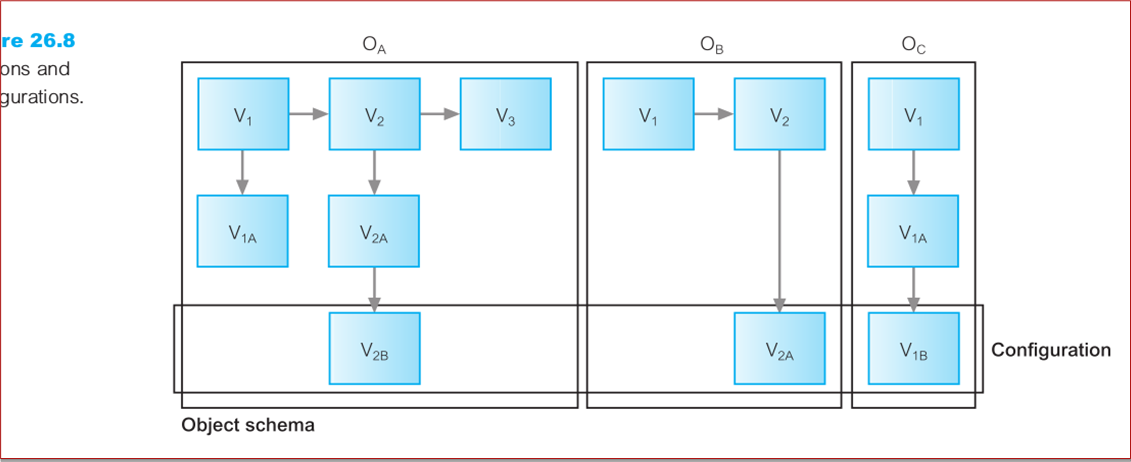

#### 3 Types of versioning

- Transient versions A transient version is considered unstable and can be updated and deleted.


  - It can be created from new by checking out a released version from a publicdatabase or by deriving it from a working or transient version in a private database.
  
  
  - In the latter case, the base transient version is promoted to a working version. Transient versions are stored in the creator’s private workspace.


- Working versions A working version is considered stable and cannot be updated, but it can be deleted by its creator. 


  - It is stored in the creator’s private workspace.


- Released versions A released version is considered stable and cannot be updated or deleted.


  - It is stored in a public database by checking in a working version from a private database
  
  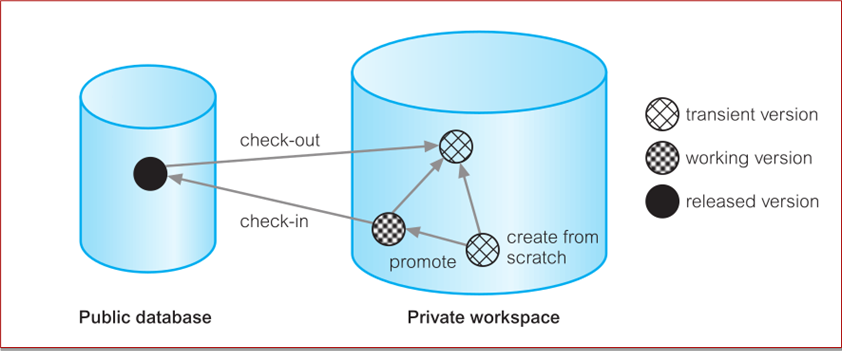

### schema evolution.

> Schema evolution deals with the need to retain current data when database schema changes are performed.

- Formally, Schema Evolution is accommodated when a database system facilitates database schema modification without the loss of existing data.

#### Typical changes to the schema include

- 1) Changes to the class definition:
  - a) modifying attributes;
  - b) modifying methods.
  
  
  
- 2) Changes to the inheritance hierarchy:
  - a) making a class S the superclass of a class C ;
  - b) removing a class S from the list of superclasses of C ;
  - c) modifying the order of the superclasses of C .
  
  
- 3) Changes to the set of classes, such as creating and deleting classes and modifying class names.



## Architectures


> In this section we discuss two architectural issues: how best to apply the client–server architecture to the OODBMS environment, and the storage of methods.


### Client–server

> Client-server architecture, architecture of a computer network in which many clients (remote processors) request and receive service from a centralized server (host computer).
- Client computers provide an interface to allow a computer user to request services of the server and to display the results the server returns.


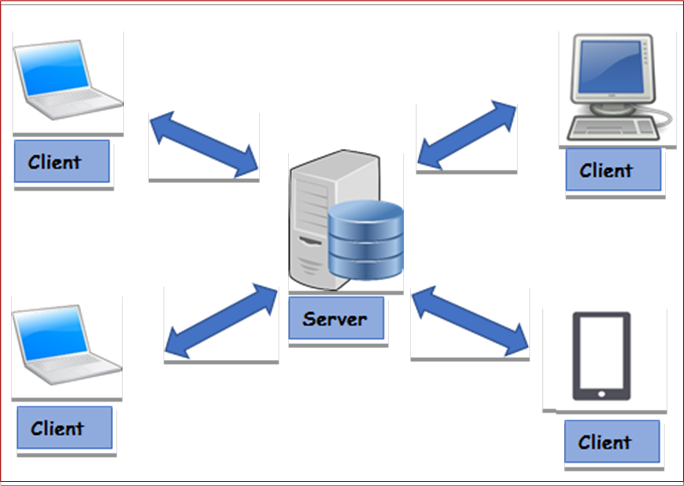


#### three basic architectures for a client–server DBMS

- Object server :
  - This approach attempts to distribute the processing between the two components. 
  - Typically, the server process is responsible for managing storage, locks,commits to secondary storage, logging and recovery, enforcing security and integrity, query optimization, and executing stored procedures.
  - The client is responsible for transaction management and interfacing to the programming language. 
  
  
> This is the best architecture for cooperative, object-to-object processing in an open, distributed environment


- Page Server
  - In this approach, most of the database processing is performed by the client. 
  - The server is responsible for secondary storage and providing pages at the client’s request.
  
- Database Server
  - In this approach, most of the database processing is performed by the server.
  - The client simply passes requests to the server, receives results,  and passes them on to the application. 
  - This is the approach taken by many RDBMSs






## Storing and executing methods

> There are two approaches to handling methods:
- store the methods in external files,


- store the methods in the database

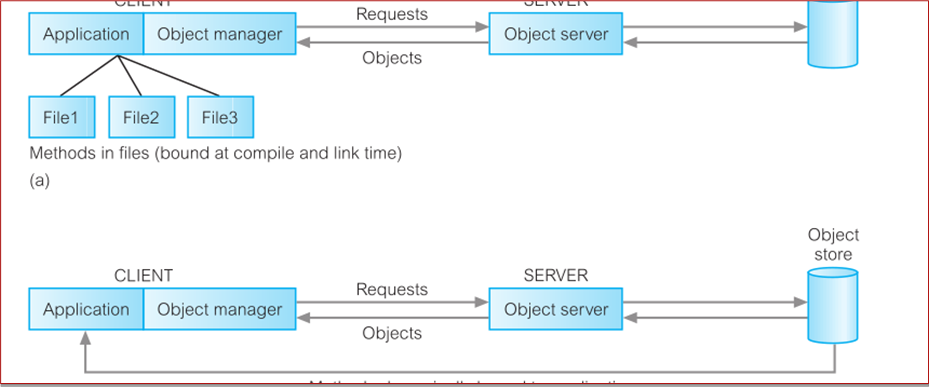

### Strategies for handling methods:



- (a) storing methods outside database;


- (b) storing methods in database.


#### The second approach offers several benefits

- It eliminates redundant code  Instead of placing a copy of a method that accesses a data element in every program that deals with that data, the method is stored only once in the database.


- It simplifies modifications Changing a method requires changing it in one place only.


- All the programs automatically use the updated method. Depending on the nature of the change, rebuilding, testing, and redistribution of programs may be eliminated.


- Methods are more secure Storing the methods in the database gives them all the benefits of security provided automatically by the OODBMS.



- Methods can be shared concurrently Again, concurrent access is provided automatically by the OODBMS. 
  - This also prevents multiple users making different changes to a method simultaneously
  
 
  
- Improved integrity : Storing the methods in the database means that integrit  constraints can be enforced consistently by the OODBMS across all applications.






## Benchmarking

> database benchmarks have been developed as a tool for comparing the performance of DBMSs normally by running a number of standard tests and trials against it

### Types

- TPC-A: measures performance in update-intensive database environments typical in on-line transaction processing (OLTP) applications


- TPC-C: an on-line transaction processing (OLTP) benchmark


- TPC-H: a decision support benchmark

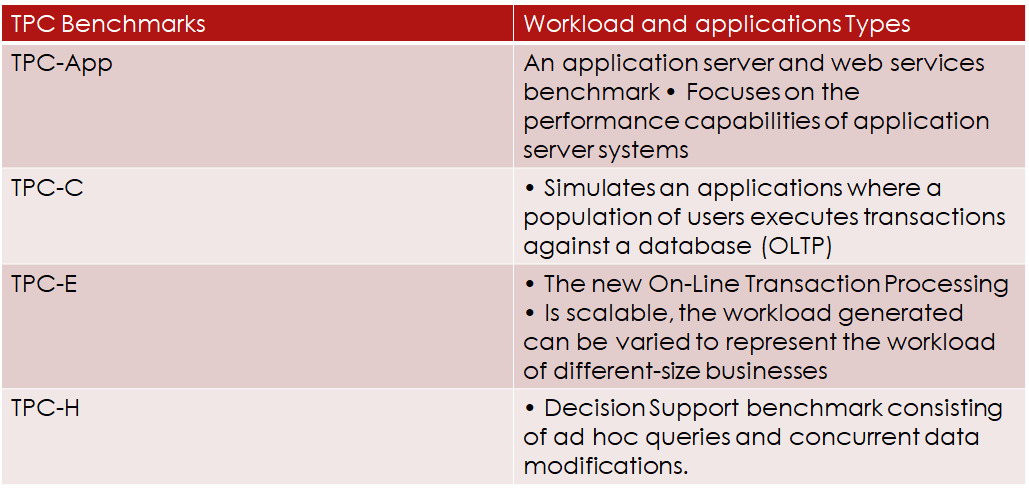


### Advantages of OODBMSs.


- Improved performance

- Enriched modeling capabilities


- Extensibility


- Removal of impedance mismatch


- More expressive query language


- Support for schema evolution


- Support for long-duration transactions


- Applicability to advanced database applications


### The disadvantages of OODBMSs

- Lack of universal data model


- Lack of experience


- Lack of standards


- Competition


- Query optimization compromises encapsulation


- Locking at object level may impact performance


- Complexity


- Lack of support for views


- Lack of support for security
